# 2024 경제 부동산 전망 리포트 자동화 feat. python-pptx

In [36]:
from pptx import Presentation
import pandas as pd
import os
import copy
from pptx.util import Inches, Pt, Cm
from pptx.dml.color import RGBColor

# 1. Cover Page

In [25]:
prs = Presentation('2024_Blue_power_Point.pptx')
slide = prs.slides[0]

# box-1 텍스트 박스 속성 부여

left = Cm(5)
top = Cm(2)
width = Cm(21)
height = Cm(3)

txBox = slide.shapes.add_textbox(left, top, width, height)
tf = txBox.text_frame

# Title
p = tf.add_paragraph()
p.text = '2024 경제 부동산 데이터 분석 및 예측'
p.font.size = Pt(35)
p.font.bold = True
p.font.color.rgb = RGBColor(50,50,255)

# box-2 텍스트 박스 속성 부여

left = Cm(17)
top = Cm(7)
width = Cm(21)
height = Cm(3)

txBox = slide.shapes.add_textbox(left, top, width, height)
tf = txBox.text_frame
p = tf.add_paragraph()
p.text = "python-pptx 패키지를 활용한 \n분석 리포트 생성 자동화"
p.font.color.rgb = RGBColor(0,0,204)
p.font.bold = True
p.font.size = Pt(30)
p.font.color.rgb = RGBColor(0,0,204)
p.font.bold = True
p.font.size = Pt(30)

# box-3 텍스트 박스 속성 부여

left = Cm(26)
top = Cm(3) + Cm(6) + Cm(6)
width = Cm(21)
height = Cm(3)

txBox = slide.shapes.add_textbox(left, top, width, height)
tf = txBox.text_frame
p = tf.add_paragraph()
p.text = "2024-2-19 \n데이터 분석가 Pablo"
p.font.color.rgb = RGBColor(255, 255, 255)
p.font.bold = True
p.font.size = Pt(15)
p.font.color.rgb = RGBColor(255, 255, 255)
p.font.bold = True
p.font.size = Pt(15)

# 2. Index Page

In [26]:
slide = prs.slides[1]

In [27]:
left = Cm(7)
top = Cm(7)
width = Cm(20)
height = Cm(10)

txBox = slide.shapes.add_textbox(left, top, width, height)
tf = txBox.text_frame

title_list = ['1. 부동산 시장 동향과 정부 경제정책', 
              '2. 매크로 경제 데이터 분석', 
              '3. 시장의 수요와 공급 데이터 시각화', 
              '4. 상관관계 분석 및 주요 경제변수 수집', 
              '5. 시장 예측 인공지능 모델개발 실무']

for i in range(len(title_list)):
    p = tf.add_paragraph()
    p.text = title_list[i]
    p.font.size = Pt(20)
    p.font.bold = True
    p.font.color.rgb = RGBColor(50,50,255)
    
    p.line_spacing = Cm(1.5)

# 3. Data Analysis Page

In [28]:
slide = prs.slides[2]

In [29]:
# 텍스트 박스 속성 부여
left = Cm(1)
top = Cm(0)
width = Cm(21)
height = Cm(3)

txBox = slide.shapes.add_textbox(left, top, width, height)
tf = txBox.text_frame

p = tf.add_paragraph()
p.text = "전국 공동주택 매매실거래 가격변화 추세분석"
p.font.color.rgb = RGBColor(255, 255, 255)
p.font.bold = True
p.font.size = Pt(24)

### 데이터 분석 결과 인사이트 도출

In [30]:
left = Cm(0)
top = Cm(0) +Cm(2)
width = Cm(21)
height = Cm(3)

txBox = slide.shapes.add_textbox(left, top, width, height)
tf = txBox.text_frame

# First bullet point
p = tf.add_paragraph()
p.text = '• 수도권 아파트 실거래가 올해 들어 9% 상승, 서울은 이보다 강한 상승세 보이며 13% 상승'
p.level = 1
p.font.size = Pt(20)
p.line_spacing = Cm(1)

# Second bullet point
p = tf.add_paragraph()
p.text = '• 최근 하락기(15개월) 동안 수도권 아파트 실거래가 24% 하락했으며 이후 7개월간 9% 상승'
p.level = 1
p.font.size = Pt(20)
p.line_spacing = Cm(1)

### 데이터 분석 시각화 및 그래프 생성`

In [31]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (20, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumGothic')

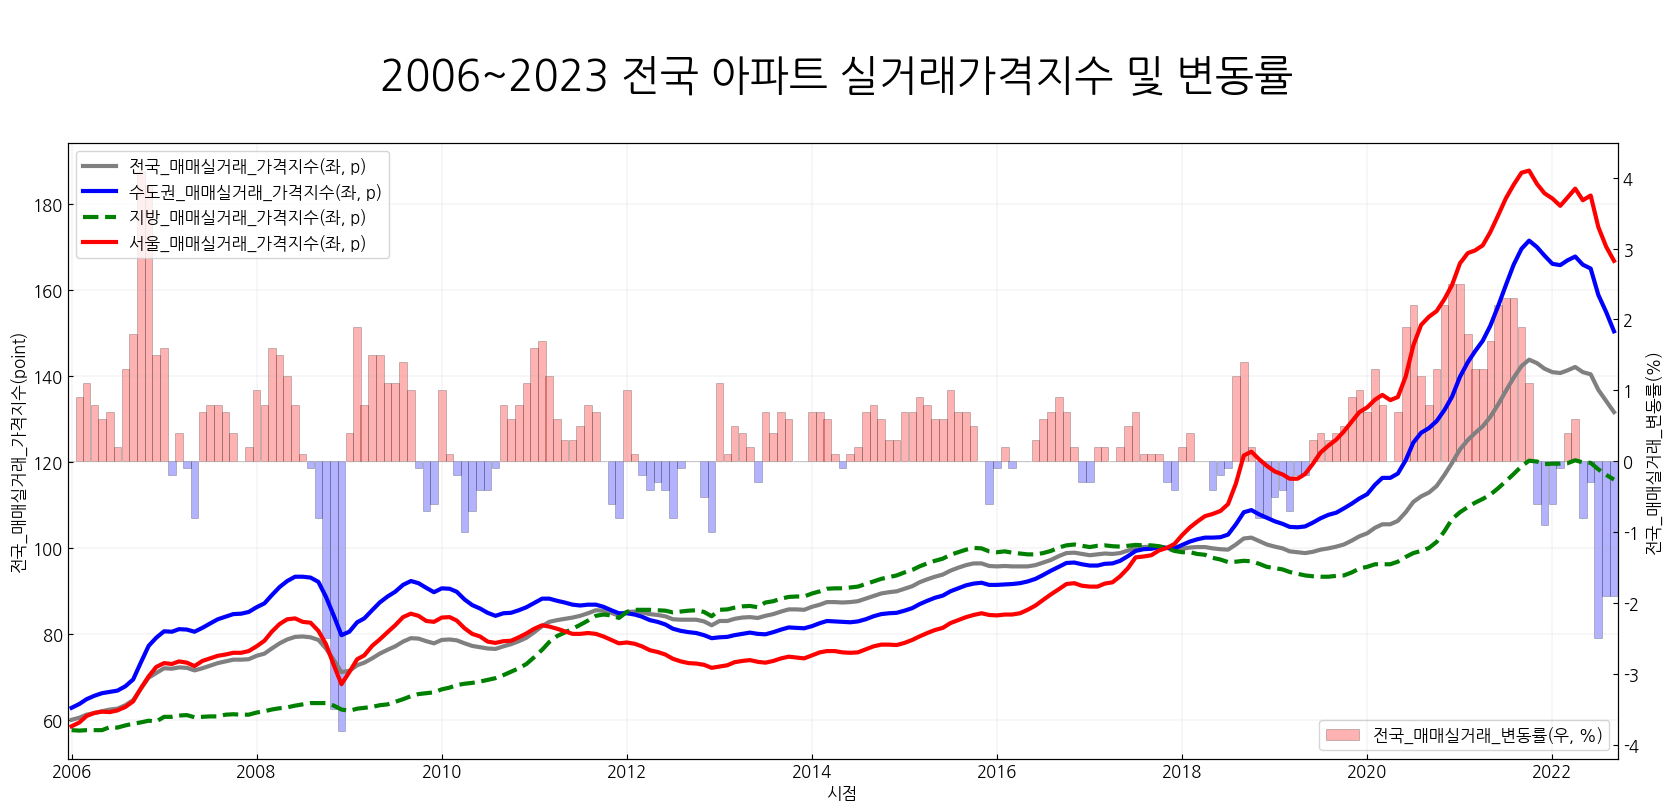

In [32]:
# 데이터 로드
df_price = pd.read_csv("./data/아파트_매매_실거래가격지수_20221201092530_분석(전월_대비_증감률).csv", encoding="cp949", skiprows=3)#, index_col=0) #, nrows=3
df_price = df_price.iloc[:,:9]
df_price.columns = ['시점','전국_지수','전국_증감률','수도권_지수','수도권_증감률','지방_지수','지방_증감률','서울_지수','서울_증감률']
df_price = df_price.replace(np.NaN, 0)

# 연도와 월 정보 추출
df_price['연도']= df_price['시점'].astype(str).str.split('.', expand=True)[0]
df_price['월']= df_price['시점'].astype(str).str.split('.', expand=True)[1]

# 월표기 오류부분 정정
df_price['월'] = df_price['월'].replace("1", "10")

# 시점을 수정된 날짜로 재조정
df_price['시점'] = df_price['연도'] + "-" + df_price['월']

# 데이터 타입 변경 (문자열 -> 날짜)
df_price['시점'] = pd.to_datetime(df_price['시점'])

# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (20, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumGothic')

# 2. 데이터 준비
x = df_price['시점']

y_전국 = df_price['전국_지수']
y_수도권 = df_price['수도권_지수']
y_지방 = df_price['지방_지수']
y_서울 = df_price['서울_지수']

y2 = df_price['전국_증감률']

# 3. 그래프 그리기
# 제목
fig, ax1 = plt.subplots()

# y1 : 
ax1.plot(x, y_전국, color='gray', linewidth=3, label='전국_매매실거래_가격지수(좌, p)')
ax1.plot(x, y_수도권, color='blue', linewidth=3, label='수도권_매매실거래_가격지수(좌, p)')
ax1.plot(x, y_지방, '--', color='green', linewidth=3, label='지방_매매실거래_가격지수(좌, p)')
ax1.plot(x,y_서울, color='red', linewidth=3, label='서울_매매실거래_가격지수(좌, p)')

# ax1.set_ylim(0, 200)
ax1.set_xlabel('시점')
ax1.set_ylabel('전국_매매실거래_가격지수(point)')
ax1.tick_params(axis='both', direction='in')

# y2 : 
ax2 = ax1.twinx()
color_fuc = lambda x : 'r' if x >=0 else 'b'
color_list = list(y2.fillna(0).apply(color_fuc))
ax2.bar(x, y2, width=30, color=color_list, edgecolor = 'black',linewidth=0.5, alpha=0.3, label='전국_매매실거래_변동률(우, %)')
ax2.set_ylabel('전국_매매실거래_변동률(%)')
ax2.tick_params(axis='y', direction='in')

# set_zorder() 메서드는 z-축 방향의 순서를 지정합니다.
ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

ax1.legend(loc='upper left')
ax2.legend(loc='lower right')

ax1.grid(linestyle='--',linewidth='0.2')

plt.title('\n2006~2023 전국 아파트 실거래가격지수 및 변동률 \n', fontsize=30)#, font="NanumGothic")
plt.margins(x=0)

plt.savefig('price_timeseries_data.png')
plt.show()

In [33]:
# 왼쪽, 윗쪽 설정
left = Cm(0) 
top = Cm(5.5)
width = Cm(33.87)
height = Cm(13.05)

# 이미지 도형 추가
pic = slide.shapes.add_picture("price_timeseries_data.png", left, top, height=height)

In [34]:
# 텍스트 박스 속성 부여
left = Cm(1)
top = Cm(16.8)
width = Cm(21)
height = Cm(2)

txBox = slide.shapes.add_textbox(left, top, width, height)
tf = txBox.text_frame

p = tf.add_paragraph()
p.text = "데이터 출처 : 한국부동산원,「아파트 매매 실거래가격지수」(2017.11=100)"
p.font.color.rgb = RGBColor(0, 0, 0)
# p.font.bold = True
p.font.size = Pt(12)

In [35]:
prs.save("./2024_경제부동산전망_리포트.pptx")